【課程名稱】<font color=#FF0000>機器學習(Machine Learning, ML)</font><br>
【授課講師】[陳祥輝 (mail : HsiangHui.Chen@gmail.com)](mailto:HsiangHui.Chen@gmail.com)<br>
【facebook】[陳祥輝老師的臉書 (歡迎加好友)](https://goo.gl/osivhx)<br>
【相關課程】[東吳推廣數位資訊學苑陳祥輝老師的課程表](https://www.ext.scu.edu.tw/courses_search.php?key=陳祥輝)<br>

In [3]:
# !pip install -U xgboost

In [2]:
# -*- coding: utf-8 -*-
from platform import python_version
import os, time, glob, socket
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, \
                            accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold, RepeatedKFold, StratifiedKFold
from sklearn.svm import SVC, SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, StackingClassifier, StackingRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

import xgboost
from xgboost import XGBClassifier, XGBRegressor

print("【日期時間】{}".format(time.strftime("%Y/%m/%d %H:%M:%S")))
print("【工作目錄】{}".format(os.getcwd()))
print("【主機名稱】{} ({})".format(socket.gethostname(),socket.gethostbyname(socket.gethostname())))
print("【Python】{}".format(python_version()))
print("【sklearn】{}".format(sklearn.__version__))
print("【{}】{}".format(xgboost.__name__, xgboost.__version__))

【日期時間】2025/05/30 18:37:00
【工作目錄】d:\NTPU_class\ml\code
【主機名稱】MSI (10.20.70.63)
【Python】3.10.5
【sklearn】1.6.1
【xgboost】3.0.2


In [4]:
from matplotlib.font_manager import FontProperties  
winfont01 = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=12) 
winfont02 = FontProperties(fname=r"c:\windows\fonts\kaiu.ttf", size=12) 

# plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  # 設定字型為微軟正黑體
# plt.rcParams['axes.unicode_minus'] = False                # 解決負號顯示問題

# macfont = FontProperties(fname="/Library/Fonts/Arial Unicode.ttf", size=10) 

### <font color=red>集成式學習 (Ensemble Learning)</font>

<img src='http://180.218.162.136:2018/Images/PyML/集成式學習的學習路徑2.PNG' width=600 align=left></img>

同質性比較常用到 異質性很少聽到有人用 <br>
bagging: 抽出或放回 抽出或放回 就可以把它變成比較大的樣本了 因為統計中資料數量很重要 <br>
gradient boost 跟 xgboost 大同小異執行的效率不太好, xgboost 可以跑分散式運算, 單機來說老師比較推薦gradient boost

- 【資料來源】 [ENSEMBLE METHODS | BAGGING VS BOOSTING DIFFERENCE](https://dataaspirant.com/ensemble-methods-bagging-vs-boosting-difference/)

- 【Different Ensemble Methods 】

<img src='https://i2.wp.com/dataaspirant.com/wp-content/uploads/2020/09/2-Ensemble-Learning.png?resize=768%2C477&ssl=1' width=500 align=left></img>

### <font color='red'>Three major kinds of meta-algorithms : </font> 
【資料來源】[Ensemble methods: bagging, boosting and stacking](https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205)
- **bagging**, that often considers <u>homogeneous weak learners</u>, learns them independently from each other <u>in parallel</u> and combines them following some kind of deterministic averaging process
- **boosting**, that often considers <u>homogeneous weak learners</u>, learns them <u>sequentially</u> in a very adaptative way (a base model depends on the previous ones) and combines them following a deterministic strategy
- **stacking**, that often considers <u>heterogeneous weak learners</u>, learns them in parallel and combines them by training a meta-model to output a prediction based on the different weak models predictions

### <font color=blue>載入資料、處理與切割資料</font>

> #### 【分類器的資料集】

In [5]:
fname = r"D:/NTPU_class/ml/code/PyMLData/titanic.csv"
titanic = pd.read_csv(fname)

# 填補遺漏值
titanic["Age"] = np.where(titanic["Age"].isna(), np.nanmedian(titanic["Age"]), titanic["Age"])

encoder = LabelEncoder()
encoded_Sex = encoder.fit_transform(titanic["Sex"])

X = pd.DataFrame([titanic["Pclass"],
                 encoded_Sex,
                 titanic["Age"]]).T
X.columns = ['Pclass', 'Sex', 'Age']
y = titanic["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

> #### 【迴歸器的資料集】

【資料集來源】
- [Housing Dataset (housing.csv)](https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv)
- [Housing Description (housing.names)](https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.names)
- Attribute Information:
    1. CRIM : per capita crime rate by town 
        - 【城鎮人均犯罪率】
    2. ZN : proportion of residential land zoned for lots over 25,000 sq.ft. 
        - 【劃出土地的住宅用地比例25,000平方呎】
    3. INDUS : proportion of non-retail business acres per town 
        - 【每個城鎮非零售業務英畝的比例】
    4. CHAS : Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
        - 【查爾斯河虛擬變量（如果束縛邊界= 1 河; 0否則）】
    5. NOX : nitric oxides concentration (parts per 10 million) 
        - 【一氧化氮濃度（百萬分之幾）】
    6. RM : average number of rooms per dwelling 
        - 【每個住宅的平均房間數】
    7. AGE : proportion of owner-occupied units built prior to 1940 
        - 【1940年之前建造的自有住房的比例】
    8. DIS : weighted distances to five Boston employment centres 
        - 【到五個波士頓就業中心的加權距離】
    9. RAD : index of accessibility to radial highways 
        - 【徑向公路可及性指數】
    10. TAX : full-value property-tax rate per \\$10,000 
        - 【每10,000美元的全值財產稅率】
    11. PTRATIO : pupil-teacher ratio by town 
        - 【按鎮分的師生比例】
    12. B : 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
        - 【1000（Bk-0.63）^ 2，其中Bk是按城鎮劃分的黑人比例】
    13. LSTAT : % lower status of the population 
        - 【人口狀況降低％】
    14. MEDV : Median value of owner-occupied homes in \\$1000's 
        - 【自有住房的中位價格（以$ 1000為單位）】

In [ ]:
# colnames = ['crim', 'zn', 'indus', 'chas', 'nox', 
#             'rm', 'age', 'dis', 'rad', 'tax', 
#             'ptratio', 'b', 'lstat', 'medv']

# url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
# data = pd.read_csv(url, header=None, names=colnames)

# X, y = data.values[:, :-1], data.values[:, -1]

# scaler = StandardScaler()
# X_std = scaler.fit_transform(X)

# X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, shuffle=True, stratify=None, random_state=None)

### <font color='red'>1. Bagging(裝袋法)</font>

#### 【資料來源】[機器學習中的ensemble：Bagging與Boosting](https://read01.com/P5zPKaz.html#.YVmYxNpBxPY)

- <img src="http://180.218.162.136:2018/Images/PyML/BaggingConcept.jpg" width=600 align=left></img>  

- <https://i3.read01.com/SIG=33dkb1i/304c575a776172366874.jpg>

#### 【資料來源】[Bagging in Financial Machine Learning: Sequential Bootstrapping. Python example](https://hudsonthames.org/bagging-in-financial-machine-learning-sequential-bootstrapping-python/)

<img src='https://hudsonthames.org/wp-content/uploads/2019/09/bagging-1.png' width=500 align=left></img>

### <font color=#0000FF>Random Forest (隨機森林) -- Bagging(裝袋法)</font>

【資料來源】<https://towardsdatascience.com/from-a-single-decision-tree-to-a-random-forest-b9523be65147>  
<img src='https://miro.medium.com/max/875/0*YEwFetXQGPB8aDFV' width=500 align=left></img>

【資料來源】<https://medium.com/@ar.ingenious/applying-random-forest-classification-machine-learning-algorithm-from-scratch-with-real-24ff198a1c57>
<img src='https://miro.medium.com/max/875/1*58f1CZ8M4il0OZYg2oRN4w.png' width=500 align=left></img>

傳統來說都是縱向的去抽資料 這裡是橫向的抽樣<br>
他的每一棵樹抽出的feature數量都有機會不一樣

【資料來源】<https://www.sciencedirect.com/topics/engineering/random-forest>   
<img src='https://ars.els-cdn.com/content/image/3-s2.0-B9780128177365000090-f09-17-9780128177365.jpg?' width=500 align=left></img>

### <font color=#0000FF>1-1. Random Forest (隨機森林) </font>

In [14]:
%%time
model = RandomForestClassifier( n_estimators=100,      # 有幾棵樹
                                criterion='gini',      # "gini" : CART, "entropy" : C4.5/C5.0
                                max_depth=None,        # 最大樹高
                                bootstrap=True,        # 是否採用拔靴法
                                oob_score=True,        # Out-Of-Band(帶外) 是否計算帶外分數
                                n_jobs=None,           # cores
                                random_state=None,     # seed
                                verbose=0,             # 訓練時顯示的訊息量
                                max_samples=None,)     # 最大的樣本數
model.fit(X_train, y_train)
print(f"OOB Score : {model.oob_score_:.3f}")
# 在講這裡的時候老師有顯示一下 所有的核心是有一起跑起來的

OOB Score : 0.743
CPU times: total: 125 ms
Wall time: 112 ms


In [15]:
print(model.estimator_)
print(model.criterion)
print(model.classes_)
print("OOB score : ", model.oob_score_)  # 從帶外的分數就可以大概看一下 有沒有over fitting 
print("train acc : ", model.score(X_train, y_train))
print("test acc : ", model.score(X_test, y_test))  # 從這裡再次確認一下 真的跟前面oob結果很像
print("-----------------")
print(model.feature_names_in_)
print(model.feature_importances_)

DecisionTreeClassifier()
gini
[0 1]
OOB score :  0.7431192660550459
train acc :  0.9357798165137615
test acc :  0.6808510638297872
-----------------
['Pclass' 'Sex' 'Age']
[0.08305049 0.36176222 0.55518729]


### <font color=blue>1-2.Meta Algorithm of Bagging : sklearn.ensemble.BaggingClassifier</font>
- [sklearn.ensemble.BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)

把相同資料把相同資料 丟進去

In [10]:
%%time
model = BaggingClassifier(estimator=DecisionTreeClassifier(criterion='gini'),  # 任意給定分類器
                          n_estimators=100,      # 有幾棵樹
                          bootstrap=True,        # 是否採用拔靴法
                          oob_score=True,        # Out-Of-Band(帶外) 是否計算帶外分數
                          n_jobs=None,           # cores
                          random_state=None,     # seed
                          verbose=0,)            # 訓練時顯示的訊息量
model.fit(X_train, y_train)
print(f"OOB Score : {model.oob_score_:.3f}")

OOB Score : 0.752
CPU times: total: 125 ms
Wall time: 119 ms


In [11]:
print(model.estimator_)
print(model.classes_)
print("OOB score : ", model.oob_score_)
print("train acc : ", model.score(X_train, y_train))
print("test acc : ", model.score(X_test, y_test))
print("-----------------")
print(model.feature_names_in_)

DecisionTreeClassifier()
[0 1]
OOB score :  0.7522935779816514
train acc :  0.9357798165137615
test acc :  0.6595744680851063
-----------------
['Pclass' 'Sex' 'Age']


### <font color=blue>1-3.Meta Algorithm of Bagging : sklearn.ensemble.BaggingRegressor</font>
- [sklearn.ensemble.BaggingRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html)

### <font color='red'>2. Boosting(提升法) -- 代表演算法 : XGBoost</font>
- 自我調適提升法(adaBoost)
- 梯度提升法(Gradient Boost)
- 極限提升法(XGBoost)

#### 【資料來源】[Boosting (machine learning)](https://www.wikiwand.com/en/Boosting_(machine_learning))

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Ensemble_Boosting.svg/640px-Ensemble_Boosting.svg.png?1633322676558' widht=300 align=left></img>

不一定哪個會比較好 還是要看資料才行

### <font color=blue>2-1. Gradient Boosting</font>

#### GradientBoostingClassifier
- Gradient Boosting for Classification

In [ ]:
%%time
model = GradientBoostingClassifier(learning_rate=0.1,  # 在這堂課沒有糾結 但如果是在類神經網路會很常用到
                                   n_estimators=1000,)
model.fit(X_train, y_train)
print(f"train acc : {model.score(X_train, y_train):.3f}")
print(f"test acc : {model.score(X_test, y_test):.3f}")
# 因為他一直強制在調整不好的部分 所以從整個演算法本來就很有可能有over fitting 這種狀況

train acc : 0.936
test acc : 0.723
CPU times: total: 625 ms
Wall time: 622 ms


#### GradientBoostingRegressor
- Gradient Boosting Machine for Regression

### <a id=XGBoost><font color=#0000FF>2-2.Gradient Boosting With XGBoost</font></a>
- XGBoost for Classification
- XGBoost for Regression
- 【說明】
    - XGBoost, which is short for “Extreme Gradient Boosting,” is a library that provides an efficient implementation of the gradient boosting algorithm.
    - The main benefit of the XGBoost implementation is computational efficiency and often better model performance.

[【HOME】](#home)

##### XGBoost for Classification

In [ ]:
%%time
model = XGBClassifier(n_estimators=1000)
model.fit(X_train, y_train)
print(f"train acc : {model.score(X_train, y_train):.3f}")
print(f"test acc : {model.score(X_test, y_test):.3f}")
# 一樣看起來有over fitting 的狀況

train acc : 0.927
test acc : 0.723
CPU times: total: 9.03 s
Wall time: 1.11 s


##### XGBoost for Regression

### <font color='red'>3. Stacking(多疊法)</font>
- Level-0 Models (Base-Models): Models fit on the training data and whose predictions are compiled.
- Level-1 Model (Meta-Model): Model that learns how to best combine the predictions of the base models.

- 【資料來源】[The concept diagram of stacking ensemble learning](https://www.researchgate.net/figure/The-concept-diagram-of-stacking-ensemble-learning-32_fig4_308368870)

<img src='https://www.researchgate.net/profile/Nipaporn-Chanamarn/publication/308368870/figure/fig4/AS:408666126733315@1474445005322/The-concept-diagram-of-stacking-ensemble-learning-32.png' width=500 align=left></img>

他有n個分類器

- 【資料來源】[Stacking -Ensemble meta Algorithms for improve predictions](https://medium.com/ml-research-lab/stacking-ensemble-meta-algorithms-for-improve-predictions-f4b4cf3b9237)

<img src='https://miro.medium.com/max/1400/0*e-na5r7mF8lVAfPK.png' width=400 align=left></img>

- 【資料來源】[Stacking -Ensemble meta Algorithms for improve predictions](https://medium.com/ml-research-lab/stacking-ensemble-meta-algorithms-for-improve-predictions-f4b4cf3b9237)

<img src='https://miro.medium.com/max/1096/0*dTmUzv-D7-A8KkE_.png' width=400 align=left></img>

他會先經歷多個演算法 最後再去給他一個決定

### <font color="blue">Stacking for Classification</font>

In [16]:
models = [LogisticRegression(),
          KNeighborsClassifier(),
          DecisionTreeClassifier(),
          GaussianNB(),]

for model in models :
    print(model.__class__.__name__)

LogisticRegression
KNeighborsClassifier
DecisionTreeClassifier
GaussianNB


> #### 評估每一個分類器的分數，使用盒形圖

In [17]:
models = [LogisticRegression(),
          KNeighborsClassifier(),
          DecisionTreeClassifier(),
          GaussianNB(),]
NAMES = list()
SCORES = list()

for model in models :
    cv = RepeatedKFold(n_splits=5, n_repeats=100, random_state=None)
    scores = cross_val_score(estimator=model,
                             X=X_train,
                             y=y_train,
                             scoring="accuracy",
                             cv=cv,
                             n_jobs=-1,
                             verbose=0,)
    NAMES.append(model.__class__.__name__)
    SCORES.append(scores)

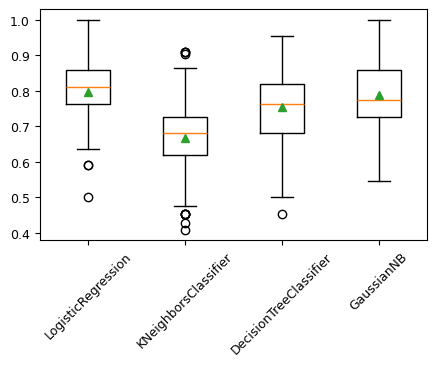

In [18]:
plt.figure(figsize=[5, 3])

plt.boxplot(x=SCORES, tick_labels=NAMES,
            showmeans=True, meanline=False,
            showfliers=True)
plt.xticks(rotation=45, fontsize=9)
plt.yticks(fontsize=9)
plt.show()

這個結果看起來 knn遜色了一些些 其他看起來都是還不錯ㄉ選項!!

> #### 建置 Stacking 的模型

In [19]:
%%time
models = [LogisticRegression(),
          KNeighborsClassifier(),
          DecisionTreeClassifier(),
          GaussianNB(),]

estimators = [(model.__class__.__name__, model) for model in models]
model = StackingClassifier(estimators=estimators,
                           final_estimator=RandomForestClassifier(),
                           cv=None,
                           n_jobs=-1,)
model.fit(X_train, y_train)
print(f"train acc : {model.score(X_train, y_train)}")
print(f"test acc : {model.score(X_test, y_test)}")

train acc : 0.7522935779816514
test acc : 0.6808510638297872
CPU times: total: 156 ms
Wall time: 2.74 s


### <font color="blue">Stacking for Regression</font>